# Predicting Automobile Insurance Claims
https://github.com/jaworXYZ/5509

## Project Topic

The project looks at the utility of a LinearSVM versus two non-parametric classifiers (random forest and KNN) for predicting automobile insurance claims. With increased ability to predict the likelihood of claims, insurers could optimize premiums to increase profits or *ideally* reduce costs to customers less likely to have claims.

## Data

This project is based off a dataset posted to Kaggle (https://www.kaggle.com/datasets/ifteshanajnin/carinsuranceclaimprediction-classification). The dataset consists of features relating to the policy holder (age, location, etc.) and features relating to the car itself. The dataset includes a binary label indicating whether or not the policy holder placed a claim within six months of the data point. 

The data is contained in a single .csv file and translates to a dataframe of over 58,000 rows and a mix of roughly 15 numerical features and almost 30 categorical features.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import f1_score
#from sklearn.model_selection import cross_val_score, GridSearchCV

import matplotlib.pylab as plt 
%matplotlib inline 

pd.options.display.max_columns = 200

In [2]:
df = pd.read_csv('data/train.csv')
print(df.shape)

(58592, 44)


In [3]:
df.head(3)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0


The dataset is composed of both numerical and categorical data. The data includes an index column (which I will remove), 42 features, and binary label. Now divide the df into X and y:

In [4]:
X = df.iloc[:,1:-1]
X.shape

(58592, 42)

In [5]:
y = df.iloc[:,-1]
y.shape

(58592,)

## Data Cleaning & Exploratory Data Analysis


In [6]:
X.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592.000000
mean,0.611246,0.069424,0.469420,18826.858667,1.763722,3.137066,1162.355851,3.626963,5.245443,4.852893,3850.476891,1672.233667,1553.33537,1385.276813,1.759950
std,0.414156,0.056721,0.122886,17660.174792,1.136988,1.832641,266.304786,0.483616,0.430353,0.228061,311.457119,112.089135,79.62227,212.423085,1.389576
min,0.002735,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.00000,1051.000000,0.000000
25%,0.210250,0.020000,0.365385,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.00000,1185.000000,0.000000
50%,0.573792,0.060000,0.451923,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.00000,1335.000000,2.000000
75%,1.039104,0.110000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,3.000000
max,1.396641,1.000000,1.000000,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.00000,1720.000000,5.000000


In [7]:
# "make" used a numerical datatype, but should be categorical
X['make'] = X['make'].astype('O')

In [8]:
# Previous description only included numerical features. Categorical features described here:
X.describe(exclude=np.number)

,area_cluster,make,segment,model,fuel_type,max_torque,max_power,engine_type,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,transmission_type,steering_type,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
count,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592
unique,22,5,6,11,3,9,9,11,2,2,2,2,2,2,2,3,2,2,2,2,2,2,2,2,2,2,2,2
top,C8,1,B2,M1,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,F8D Petrol Engine,No,Yes,No,Yes,No,Drum,Manual,Power,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes
freq,13654,38126,18314,14948,20532,17796,17796,14948,40191,35526,44574,56219,35704,44574,38181,33502,33928,41634,41634,38077,32177,42435,42435,57383,34291,36309,42435,58229


In [9]:
# We will drop the features that are very unbalanced like "is_speed_alert" which is 99.4% yes
drop_list = ["is_speed_alert","is_power_steering","is_parking_sensors"]
X = X.drop(drop_list,axis=1)

# One-hot encode remaining categorical features to ensure better compatibility with Pandas and SKLearn libraries
Xo = pd.get_dummies(X,drop_first=True)

C:\Users\jawor\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [10]:
Xo.shape

(58592, 100)

Even dropping the (redundant) first columns of the categorical data, we now a very large set of features (100!).

Now checking for correlation, and hopefully dropping some (many) columns:

<AxesSubplot:>

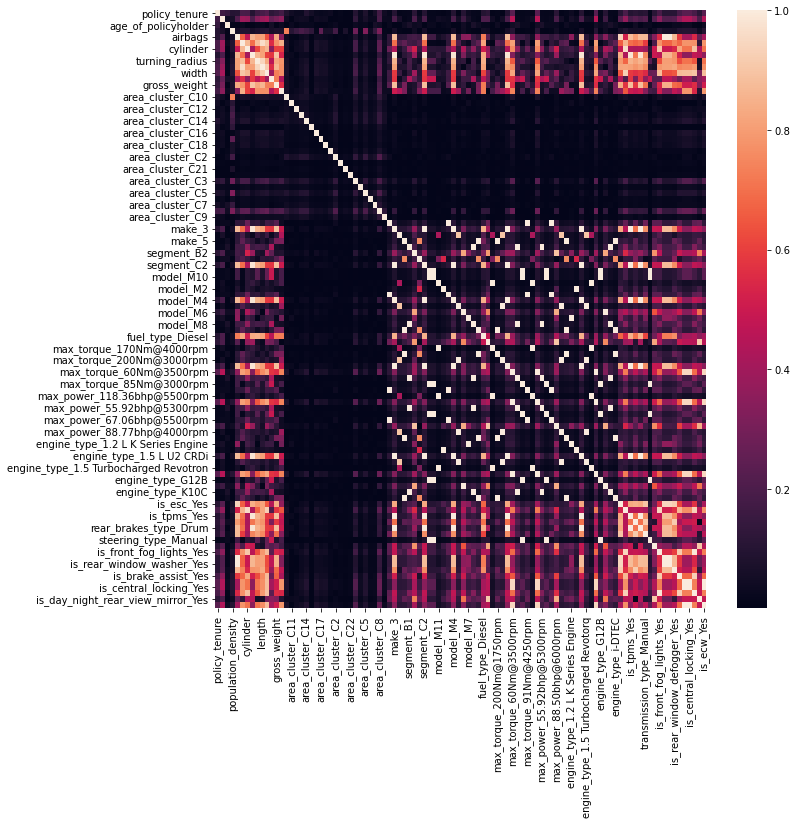

In [11]:
corr = Xo.corr().abs()
fig, ax = plt.subplots(figsize=(11,11))         # Sample figsize in inches
sns.heatmap(corr,ax=ax)

There above heatmap shows that there are some points of very high correlation. However, with 100 features it isn't easy to see which features those are.

In [12]:
c = corr.abs().unstack().sort_values()
c[(c>0.9)&(c<1.0)]

is_front_fog_lights_Yes            cylinder                             0.904696
cylinder                           is_front_fog_lights_Yes              0.904696
steering_type_Power                is_day_night_rear_view_mirror_Yes    0.905242
is_day_night_rear_view_mirror_Yes  steering_type_Power                  0.905242
fuel_type_Petrol                   is_day_night_rear_view_mirror_Yes    0.910817
                                                                          ...   
model_M4                           rear_brakes_type_Drum                1.000000
make_3                             rear_brakes_type_Drum                1.000000
rear_brakes_type_Drum              engine_type_1.5 L U2 CRDi            1.000000
                                   is_tpms_Yes                          1.000000
is_tpms_Yes                        rear_brakes_type_Drum                1.000000
Length: 86, dtype: float64

Accounting for duplicate pair, there are over 40 features with absolute correlation between 0 and 1. Rather than look at correlations between specific category labels, it seems sensible to compare categories themselves.

Next we will look at specific pairings of categoricals to see how they correlate, and see if they can be removed entirely.

In [13]:
# helper method to plot correlation of labels within specific features
def cat_corr(cat1,cat2):
    cat1o = pd.get_dummies(X[cat1],drop_first=True)
    cat2o = pd.get_dummies(X[cat2],drop_first=True)
    corr = cat1o.join(cat2o).corr().abs()
    corr = corr.iloc[cat1o.shape[1]:,:cat2o.shape[1]]
    print("Overall correlation is %s." % np.mean(corr.max()))
    sns.heatmap(corr)

Overall correlation is 0.9233160799269159.


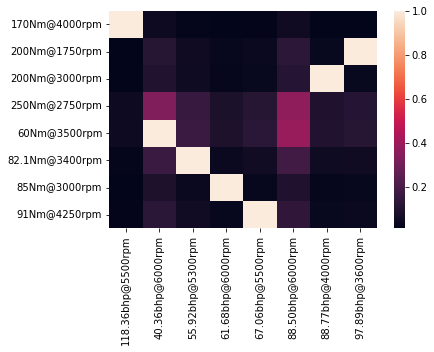

In [14]:
cat_corr('max_power','max_torque')

We can see that max power and torque are correlated almost 1:1 for almost all configurations and that the average correlation is above 90%. It would make sense to drop at least one of these features.

Overall correlation is 0.895968228162068.


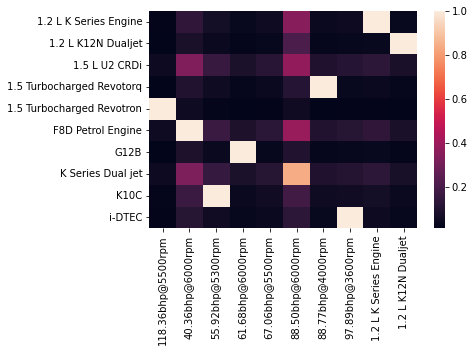

In [15]:
# continue checking other features
cat_corr('max_power','engine_type')

Checking max_power against engine_type again confirms a strong correlation. This makes intuitive sense as there appear to be only a small handful of identical engine configurations.

Rather than analyze each pair individually, we should automate some of this:

<AxesSubplot:>

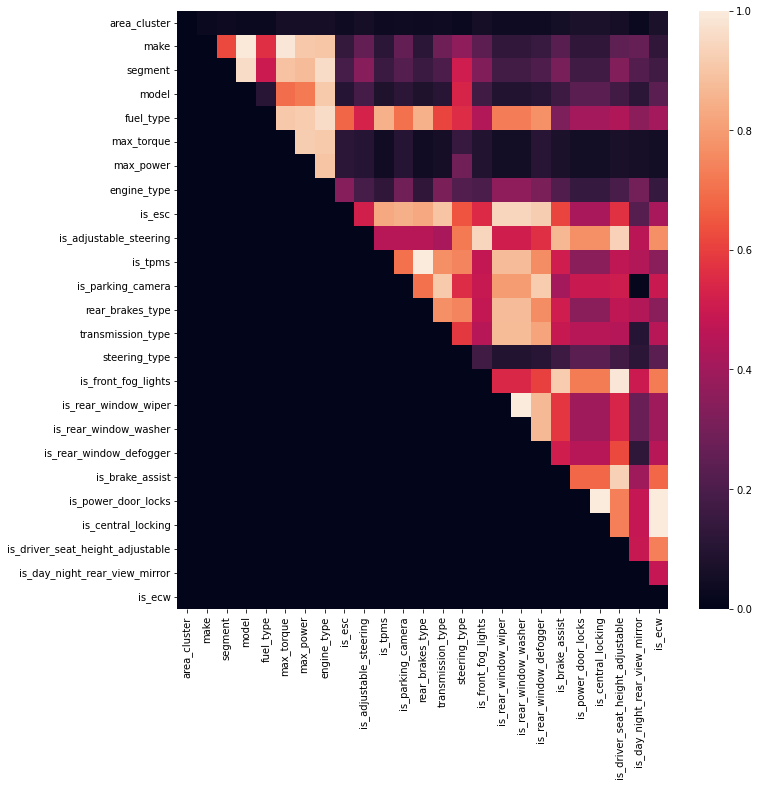

In [16]:
# create a list of categorical features
cat_list = []
for col in X.columns:
    if X[col].dtype == 'O':
        cat_list.append(col)

# iterate through list of features and create average categorical correlation plot for values over the diagonal        
corr = []     
for i in range(len(cat_list)):
    next_line = []
    for j in range(len(cat_list)):
        if i >= j:
            next_line.append(0)
        else:
            cat1o = pd.get_dummies(df[cat_list[i]],drop_first=True)
            cat2o = pd.get_dummies(df[cat_list[j]],drop_first=True)
            corr_ij = pd.concat([cat1o, cat2o], axis=1).corr().abs()
            corr_ij = corr_ij.iloc[cat1o.shape[1]:,:cat2o.shape[1]]
            next_line.append(np.mean(corr_ij.max()))
    corr.append(next_line)
    
corr = pd.DataFrame(corr,index=cat_list, columns=cat_list)

fig, ax = plt.subplots(figsize=(11,11))
sns.heatmap(corr,ax=ax)

In [17]:
# identify most correlative categorical pairs
c = corr.unstack().sort_values()
c[(c>0.9)&(c<1.0)]

engine_type                       make                      0.902007
max_power                         make                      0.908777
max_torque                        fuel_type                 0.910149
engine_type                       model                     0.912024
                                  max_torque                0.912024
transmission_type                 is_parking_camera         0.913194
is_brake_assist                   is_front_fog_lights       0.915803
is_rear_window_defogger           is_parking_camera         0.916767
max_power                         fuel_type                 0.916786
                                  max_torque                0.921298
is_rear_window_defogger           is_esc                    0.921832
is_driver_seat_height_adjustable  is_brake_assist           0.929115
                                  is_adjustable_steering    0.931436
is_rear_window_wiper              is_esc                    0.943207
is_rear_window_washer             

In [18]:
# select categorical features from above pairs to reduce correlations within dataset
# leaving 'make' in as I already want to drop many features it strongly correlates with
drop_list = ['max_torque', 'max_power','model','is_tpms','is_front_fog_lights','fuel_type','is_rear_window_washer','is_esc']

Correlation of numerical features:

<AxesSubplot:>

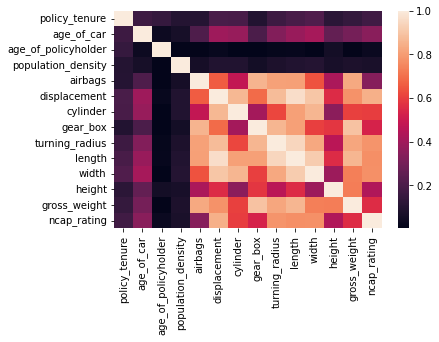

In [19]:
c2 = X.select_dtypes(exclude='O').corr().abs()
sns.heatmap(c2)

In [20]:
c2 = c2.unstack().sort_values()
c2[(c2>0.9)&(c2<1.0)]

length          width             0.915918
width           length            0.915918
turning_radius  length            0.944899
length          turning_radius    0.944899
                displacement      0.961655
displacement    length            0.961655
dtype: float64

In [21]:
# Add "length" to list of features to drop
drop_list.append('length')

Create a reduced and normalized dataframe "Xn" to build models from

In [22]:
# We will Xo now and create a new DataFrame with dropped features, one-hot encodings, and normalization
# Min-Max normalize numerical features to best fit with binary one-hot encodings of categorical data
Xn = X.drop(drop_list,axis=1)
for col in Xn.columns:
    if Xn[col].dtype != 'O':
        #Xn[col] = (Xn[col]-Xn[col].mean())/Xn[col].std()
        Xn[col] = (Xn[col]-Xn[col].min())/(Xn[col].max()-Xn[col].min())
        
# OHE
Xn = pd.get_dummies(Xn,drop_first=True)
Xn

C:\Users\jawor\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,policy_tenure,age_of_car,age_of_policyholder,population_density,airbags,displacement,cylinder,gear_box,turning_radius,width,height,gross_weight,ncap_rating,area_cluster_C10,area_cluster_C11,area_cluster_C12,area_cluster_C13,area_cluster_C14,area_cluster_C15,area_cluster_C16,area_cluster_C17,area_cluster_C18,area_cluster_C19,area_cluster_C2,area_cluster_C20,area_cluster_C21,area_cluster_C22,area_cluster_C3,area_cluster_C4,area_cluster_C5,area_cluster_C6,area_cluster_C7,area_cluster_C8,area_cluster_C9,make_2,make_3,make_4,make_5,segment_B1,segment_B2,segment_C1,segment_C2,segment_Utility,engine_type_1.2 L K Series Engine,engine_type_1.2 L K12N Dualjet,engine_type_1.5 L U2 CRDi,engine_type_1.5 Turbocharged Revotorq,engine_type_1.5 Turbocharged Revotron,engine_type_F8D Petrol Engine,engine_type_G12B,engine_type_K Series Dual jet,engine_type_K10C,engine_type_i-DTEC,is_adjustable_steering_Yes,is_parking_camera_Yes,rear_brakes_type_Drum,transmission_type_Manual,steering_type_Manual,steering_type_Power,is_rear_window_wiper_Yes,is_rear_window_defogger_Yes,is_brake_assist_Yes,is_power_door_locks_Yes,is_central_locking_Yes,is_driver_seat_height_adjustable_Yes,is_day_night_rear_view_mirror_Yes,is_ecw_Yes
0,0.368130,0.05,0.500000,0.064260,0.2,0.000000,0.0,0.0,0.142857,0.119048,0.000000,0.200299,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0
1,0.480580,0.02,0.121622,0.365231,0.2,0.000000,0.0,0.0,0.142857,0.119048,0.000000,0.200299,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0
2,0.601457,0.02,0.135135,0.051764,0.2,0.000000,0.0,0.0,0.142857,0.119048,0.000000,0.200299,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0
3,0.643904,0.11,0.202703,0.291660,0.2,0.571225,1.0,0.0,0.428571,0.773810,0.114286,0.424514,0.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,1,1,1,1,1,1
4,0.425902,0.11,0.486486,0.470987,0.2,0.289174,0.0,0.0,0.714286,0.309524,0.042857,0.155456,0.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,0.252782,0.13,0.500000,0.116270,0.2,0.289174,0.0,0.0,0.714286,0.309524,0.042857,0.155456,0.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,1,1
58588,0.858671,0.02,0.324324,0.102516,0.2,0.000000,0.0,0.0,0.142857,0.119048,0.000000,0.200299,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0
58589,0.831862,0.05,0.229730,0.470987,0.2,0.000000,0.0,0.0,0.142857,0.119048,0.000000,0.200299,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0
58590,0.884975,0.14,0.378378,0.116270,0.2,0.571225,1.0,0.0,0.428571,0.773810,0.157143,0.424514,0.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,1,1,1,1,1,1


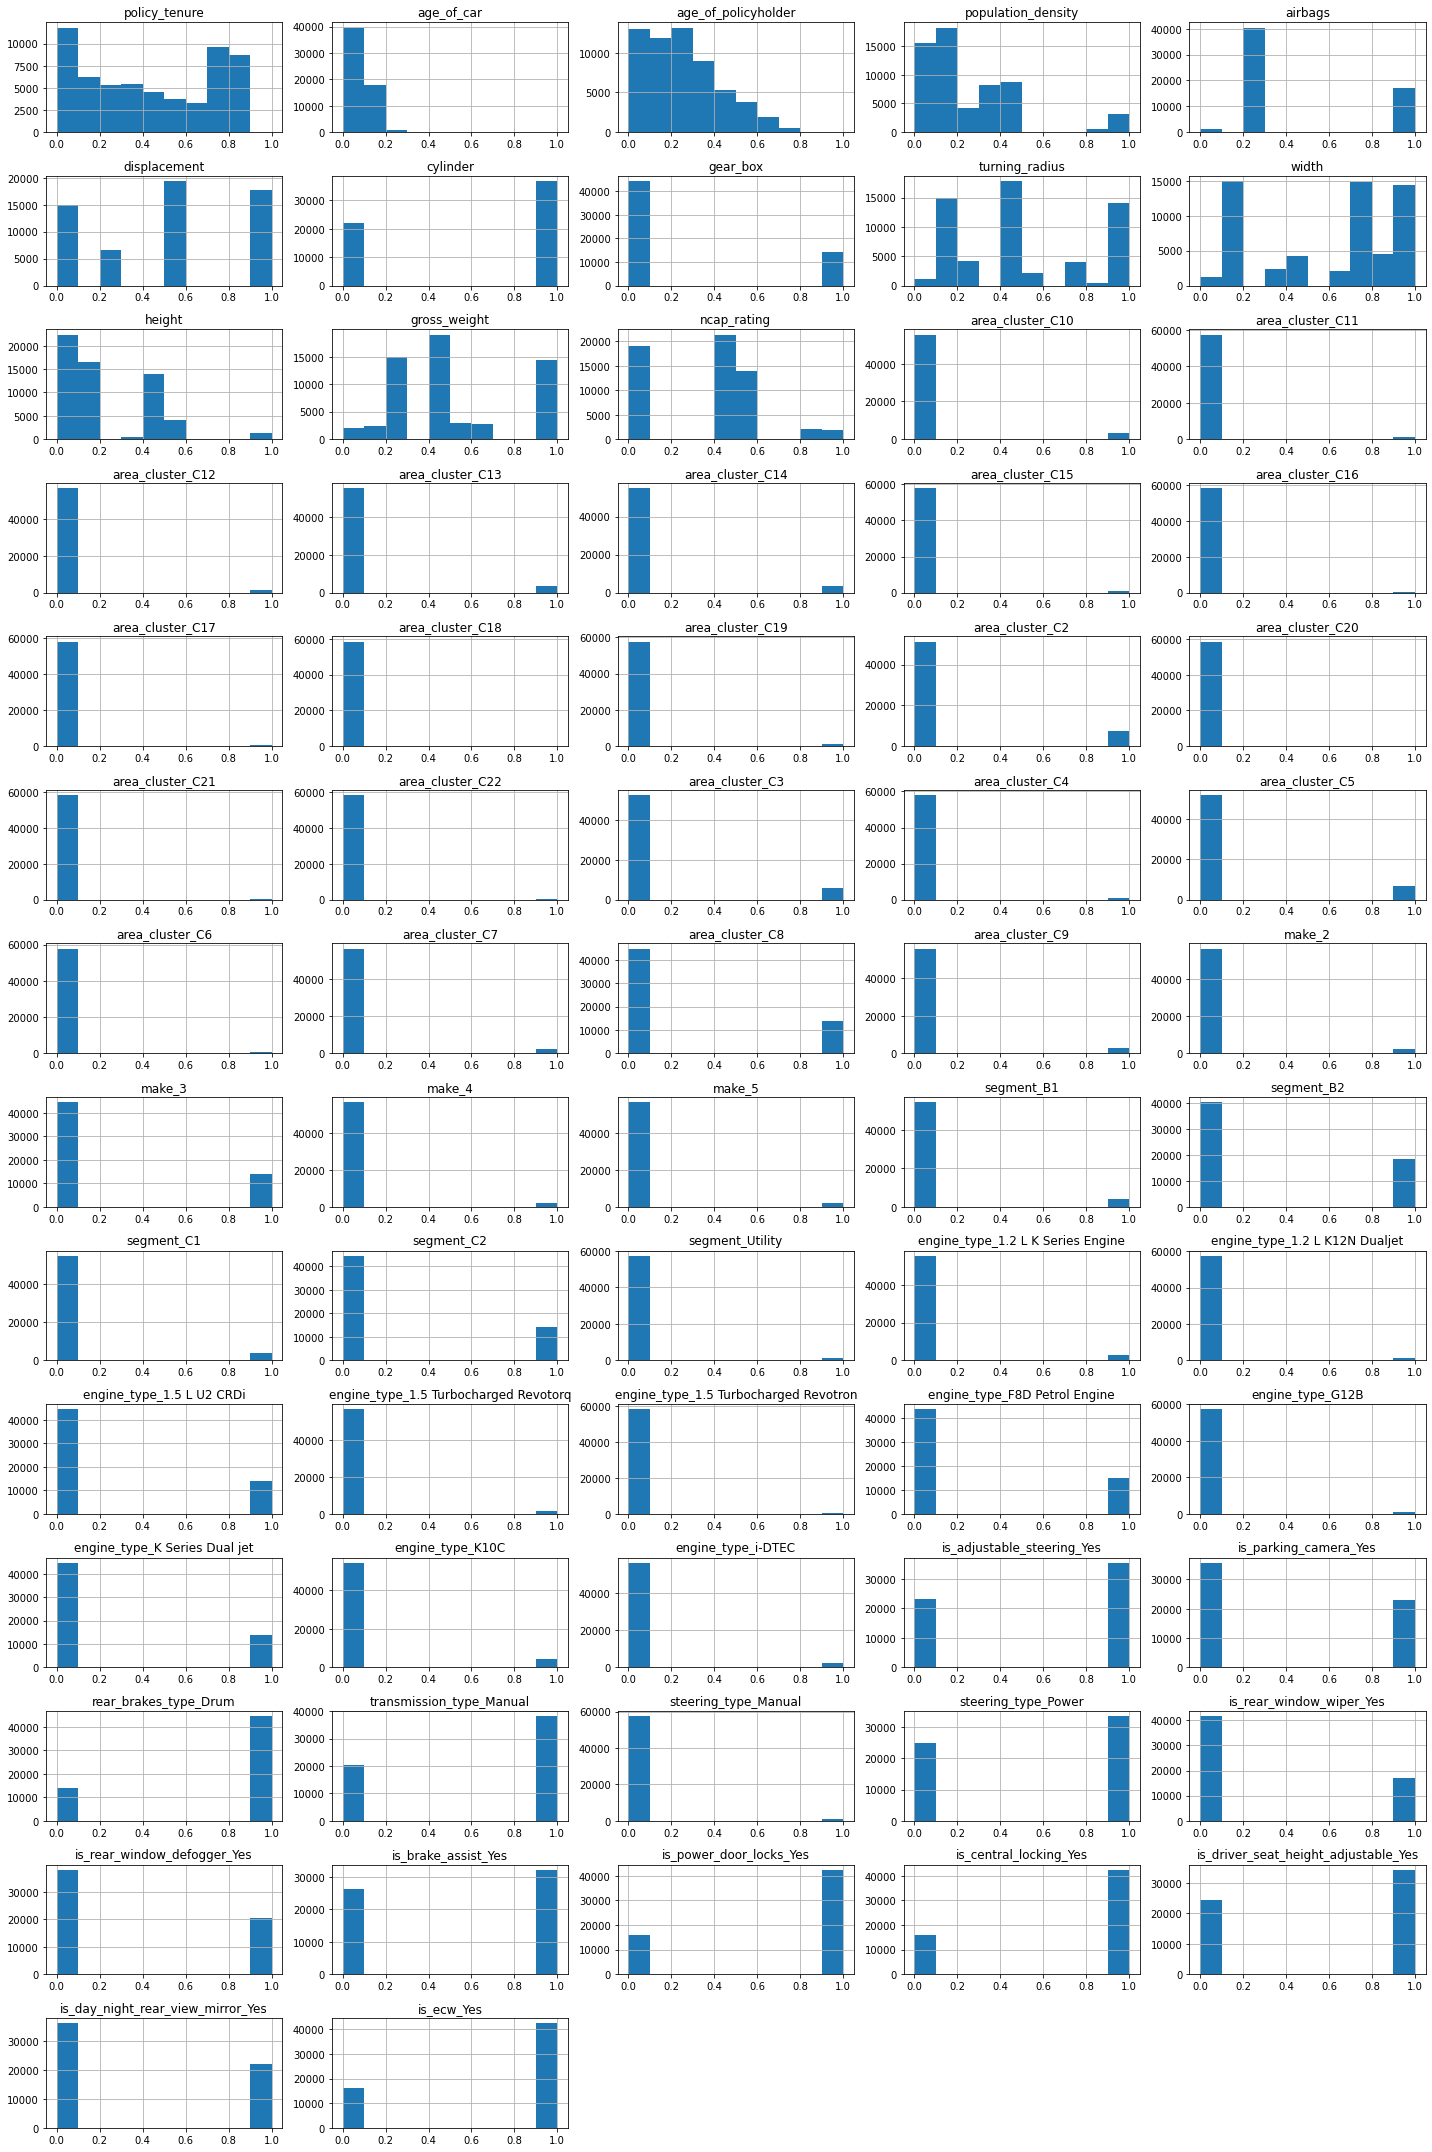

In [23]:
Xn.hist(figsize=(20,30), layout=(14,5))
plt.tight_layout()

The histograms of the numerical models don't suggest any irregularities in the data. The histograms of the categorical values don't illustrate very much other than which specific categories are under/over-presented within their features.

Split data into training and test sets:

In [24]:
X_train, X_test, y_train, y_test = train_test_split(Xn,y, test_size=0.15, random_state=13)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(49803, 67)
(8789, 67)
(49803,)
(8789,)


## Models & Results

In [26]:
# Check for imbalance among y values
np.mean(y_train)

0.0647350561211172

Given the there are so few claims made (<6.5% of policies has claims), the data is quite imbalanced. Simple accuracy won't be sufficient for testing performance. Instead  use the **F1-score**. 

The imbalance will have to be accounted for in the models. It won't affect the KNN model, but the Random Forest in particular could be susceptible to issues with imbalance. The SKLearn implementations of both Random Forest and LinearSVC include class_weight parameters that will hopefully make a difference.

### Model 1: KNN

Maximum F1-score of  0.0724907063197026


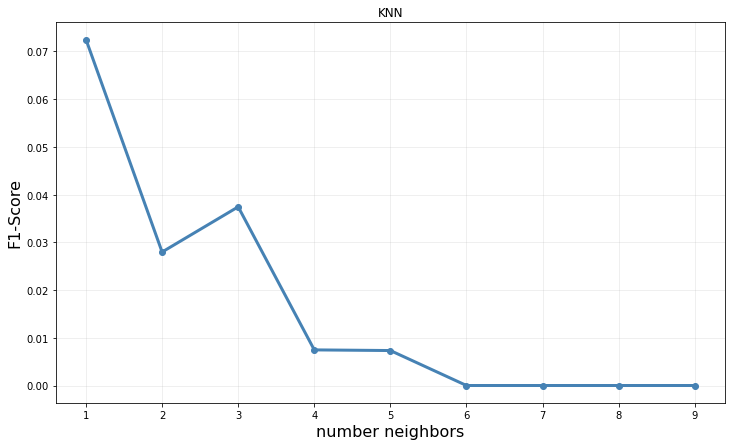

In [27]:
# KNN for values of n_neighbors
all_par = range(1,10)
scores = []
for p in all_par:
    knn = KNeighborsClassifier(n_neighbors=p)
    y_hat = knn.fit(X_train, y_train).predict(X_test)
    scores.append(f1_score(y_test,y_hat))
    
print('Maximum F1-score of ',max(scores))
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(12,7))
ax.plot(all_par, scores, marker="o", color="steelblue", lw=3, label="unweighted")
ax.set_xlabel("number neighbors", fontsize=16)
ax.set_ylabel("F1-Score", fontsize=16)
ax.set_title("KNN")
ax.grid(alpha=0.25)

It is clear from the above that k=1 yields the highest performance. Unfortunately, the f-score is still very low. The is nothing to be done here to account for imbalance.

### Model 2: Random Forest
We will begin with a default random forest and then modify some of the parameters to see what effect that has.

In [28]:
# RandomForest (Default)
y_hat = RandomForestClassifier(random_state=13).fit(X_train, y_train).predict(X_test)
f1_score(y_test,y_hat)

0.013961605584642234

In [29]:

y_hat = RandomForestClassifier(max_features='log2',random_state=13).fit(X_train, y_train).predict(X_test)
f1_score(y_test,y_hat)

0.013937282229965157

In [30]:
y_hat = RandomForestClassifier(class_weight={0: 1, 1: 5},random_state=13).fit(X_train, y_train).predict(X_test)
f1_score(y_test,y_hat)

0.017574692442882248

There is some promise here that increasing the class weights could lead to better performance.

Maximum F1-score of  0.017605633802816902


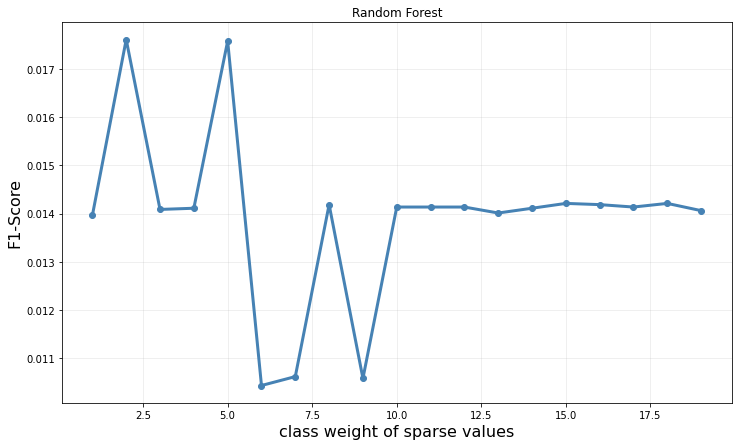

In [31]:
# RandomForest for class_weights
all_par = range(1,20)
scores = []
for p in all_par:
    clf = RandomForestClassifier(class_weight={0: 1, 1: p},random_state=13)
    y_hat = clf.fit(X_train, y_train).predict(X_test)
    scores.append(f1_score(y_test,y_hat))
    
print('Maximum F1-score of ',max(scores))
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(12,7))
ax.plot(all_par, scores, marker="o", color="steelblue", lw=3, label="unweighted")
ax.set_xlabel("class weight of sparse values", fontsize=16)
ax.set_ylabel("F1-Score", fontsize=16)
ax.set_title("Random Forest")
ax.grid(alpha=0.25)

Given the jagged nature of the trendline, it doesn't appear that this will consistently improve the performance for any values of the class weight.

Maximum F1-score of  0.15828877005347594


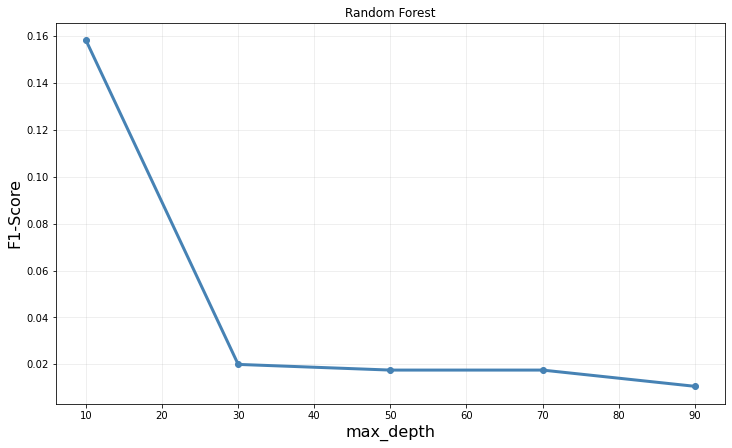

In [32]:
# RandomForest for values of max_depth
all_par = range(10,100,20)
scores = []
for p in all_par:
    clf = RandomForestClassifier(class_weight='balanced',max_depth=p)
    y_hat = clf.fit(X_train, y_train).predict(X_test)
    scores.append(f1_score(y_test,y_hat))
    
print('Maximum F1-score of ',max(scores))
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(12,7))
ax.plot(all_par, scores, marker="o", color="steelblue", lw=3, label="unweighted")
ax.set_xlabel("max_depth", fontsize=16)
ax.set_ylabel("F1-Score", fontsize=16)
ax.set_title("Random Forest")
ax.grid(alpha=0.25)

Maximum F1-score of  0.15998101115594587


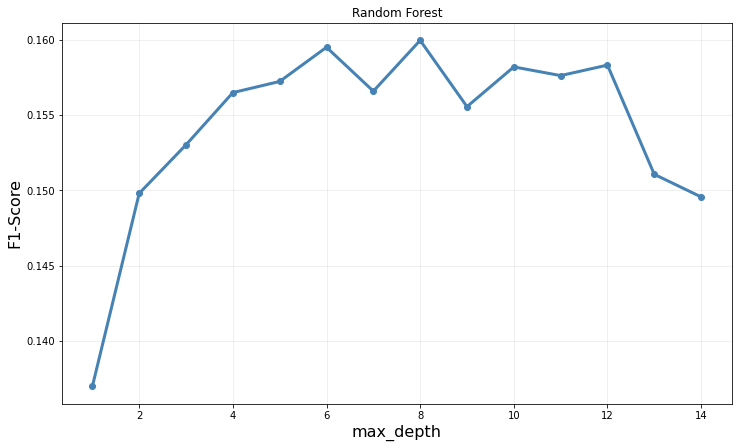

In [33]:
# RandomForest for values of max_depth (refined range of values)
all_par = range(1,15)
scores = []
for p in all_par:
    clf = RandomForestClassifier(class_weight='balanced',max_depth=p)
    y_hat = clf.fit(X_train, y_train).predict(X_test)
    scores.append(f1_score(y_test,y_hat))
    
print('Maximum F1-score of ',max(scores))
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(12,7))
ax.plot(all_par, scores, marker="o", color="steelblue", lw=3, label="unweighted")
ax.set_xlabel("max_depth", fontsize=16)
ax.set_ylabel("F1-Score", fontsize=16)
ax.set_title("Random Forest")
ax.grid(alpha=0.25)

Maximum F1-score of  0.1472837022132797


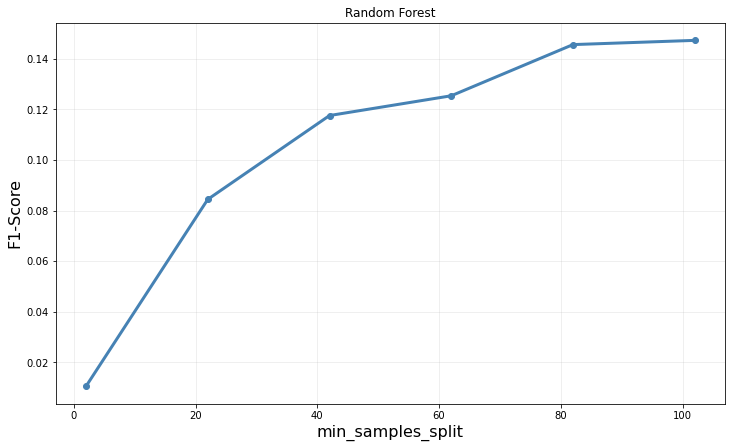

In [34]:
# RandomForest for values of min_samples_split
all_par = range(2,122,20)
scores = []
for p in all_par:
    clf = RandomForestClassifier(class_weight='balanced',min_samples_split=p)
    y_hat = clf.fit(X_train, y_train).predict(X_test)
    scores.append(f1_score(y_test,y_hat))
    
print('Maximum F1-score of ',max(scores))
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(12,7))
ax.plot(all_par, scores, marker="o", color="steelblue", lw=3, label="unweighted")
ax.set_xlabel("min_samples_split", fontsize=16)
ax.set_ylabel("F1-Score", fontsize=16)
ax.set_title("Random Forest")
ax.grid(alpha=0.25)

In [35]:
# RandomForest grid search
all_max_depths = range(8,15)
all_min_split = range(50,125,15)
scores = []
for i in all_max_depths:
    next_line = []
    for j in all_min_split:
        clf = RandomForestClassifier(class_weight='balanced',min_samples_split=p)
        y_hat = clf.fit(X_train, y_train).predict(X_test)
        next_line.append(f1_score(y_test,y_hat))
    scores.append(next_line)

<AxesSubplot:>

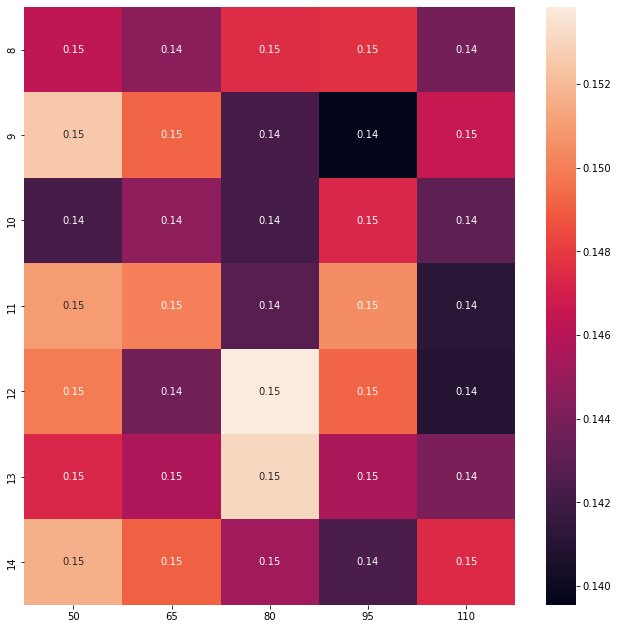

In [36]:
scores = pd.DataFrame(scores,index=all_max_depths, columns=all_min_split)
fig, ax = plt.subplots(figsize=(11,11))
sns.heatmap(scores,ax=ax,annot=True)

<AxesSubplot:>

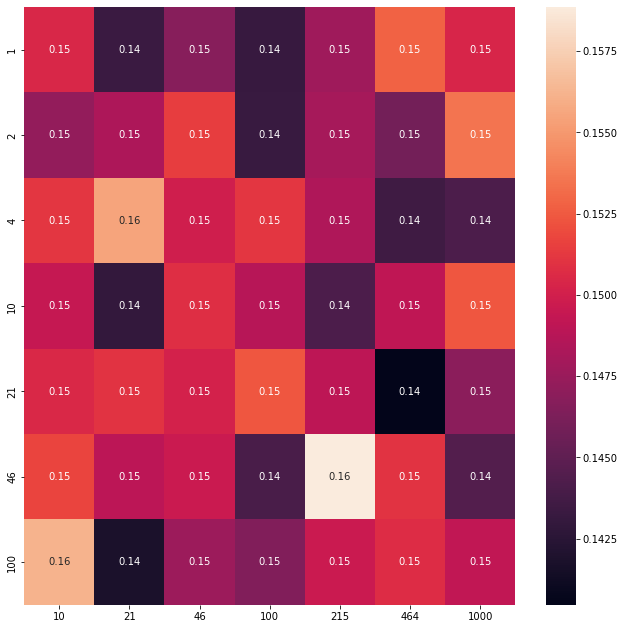

In [37]:
# RandomForest grid search over a larger range of values
all_max_depths = np.logspace(0,2,7).astype(int)
all_min_split = np.logspace(1,3,7).astype(int)
scores = []
for i in all_max_depths:
    next_line = []
    for j in all_min_split:
        clf = RandomForestClassifier(class_weight='balanced',min_samples_split=p)
        y_hat = clf.fit(X_train, y_train).predict(X_test)
        next_line.append(f1_score(y_test,y_hat))
    scores.append(next_line)

scores = pd.DataFrame(scores,index=all_max_depths, columns=all_min_split)
fig, ax = plt.subplots(figsize=(11,11))
sns.heatmap(scores,ax=ax,annot=True)

It doesn't appear likely that any combination of values will result in performance exceeding the earlier max F1-score of 0.162 when using max_depth=11

### Model 3: Linear SVC
Begin with default model.

In [38]:
# LinearSVC (Default)
y_hat = LinearSVC(random_state=13).fit(X_train, y_train).predict(X_test)
f1_score(y_test,y_hat)

0.0

In [39]:
y_hat.mean()

0.0

The default model has F1-score of zero, which suggests either the precision or accuracy are zero. Checking the mean shows that model is mislabeling everything as "0" (no claim). This is likely due to the lack of imbalance handling.

In [40]:
# LinearSVC (Balanced)
y_hat = LinearSVC(random_state=13,class_weight='balanced').fit(X_train, y_train).predict(X_test)
f1_score(y_test,y_hat)

C:\Users\jawor\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.14056497175141244

Success! Balancing the model has already resulted in a dramatic performance improvement, but still not one that exceeds the Random Forest.

C:\Users\jawor\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\jawor\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\jawor\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\jawor\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\jawor\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\jawor\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

Maximum F1-score of  0.14056497175141244


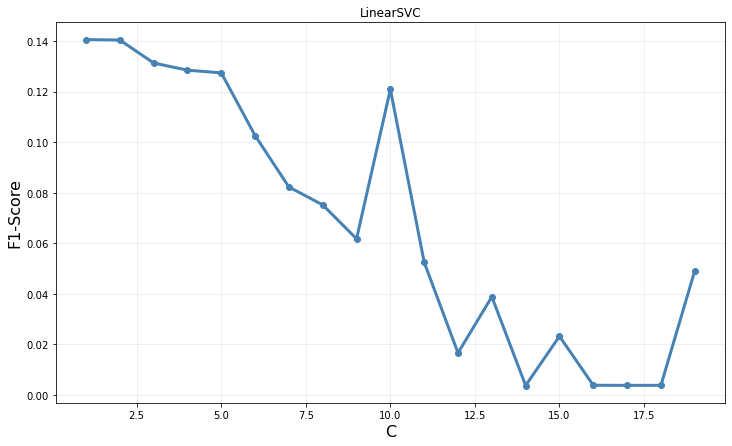

In [41]:
# LinearSVC for C
all_par = range(1,20)
scores = []
for p in all_par:
    svc = LinearSVC(random_state=13,class_weight='balanced',C=p)
    y_hat = svc.fit(X_train, y_train).predict(X_test)
    scores.append(f1_score(y_test,y_hat))
    
print('Maximum F1-score of ',max(scores))
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(12,7))
ax.plot(all_par, scores, marker="o", color="steelblue", lw=3, label="unweighted")
ax.set_xlabel("C", fontsize=16)
ax.set_ylabel("F1-Score", fontsize=16)
ax.set_title("LinearSVC")
ax.grid(alpha=0.25)

C:\Users\jawor\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\jawor\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\jawor\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\jawor\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\jawor\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\jawor\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

Maximum F1-score of  0.14140959243413648


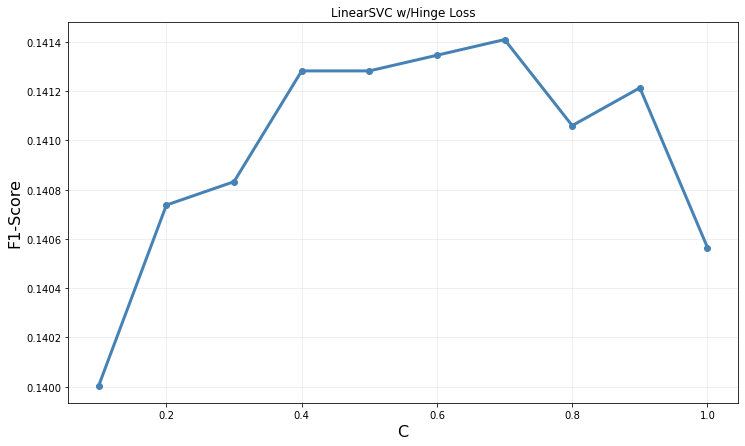

In [42]:
# LinearSVC for C (low values)
all_par = np.linspace(0.1,1,10)
scores = []
for p in all_par:
    svc = LinearSVC(random_state=13,class_weight='balanced',C=p)
    y_hat = svc.fit(X_train, y_train).predict(X_test)
    scores.append(f1_score(y_test,y_hat))
    
print('Maximum F1-score of ',max(scores))
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(12,7))
ax.plot(all_par, scores, marker="o", color="steelblue", lw=3, label="unweighted")
ax.set_xlabel("C", fontsize=16)
ax.set_ylabel("F1-Score", fontsize=16)
ax.set_title("LinearSVC w/Hinge Loss")
ax.grid(alpha=0.25)

C:\Users\jawor\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\jawor\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\jawor\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\jawor\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\jawor\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\jawor\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

Maximum F1-score of  0.13715498938428874


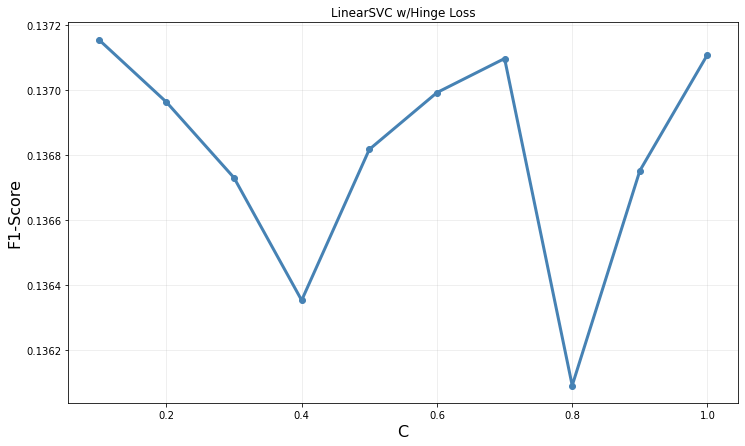

In [43]:
# LinearSVC for C (low values), hinge loss
all_par = np.linspace(0.1,1,10)
scores = []
for p in all_par:
    svc = LinearSVC(random_state=13,class_weight='balanced',C=p, loss='hinge')
    y_hat = svc.fit(X_train, y_train).predict(X_test)
    scores.append(f1_score(y_test,y_hat))
    
print('Maximum F1-score of ',max(scores))
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(12,7))
ax.plot(all_par, scores, marker="o", color="steelblue", lw=3, label="unweighted")
ax.set_xlabel("C", fontsize=16)
ax.set_ylabel("F1-Score", fontsize=16)
ax.set_title("LinearSVC w/Hinge Loss")
ax.grid(alpha=0.25)

Hinge Loss hasn't improved upon the performance of the model using squared_hinge. 

## Discussion and Conclusion
Despite an expectation that SVM would be the best performing model and that Random Forest might not be able to handle the imbalanced data, it was the Random Forest that did the best.

### Learning and Takeaways
This project made it very clear to me why imbalance must be taken into account. When first playing around with the models, I had defaulted to using accuracy as a metric (a big mistake!). The first SVM model I ran had very high accuracy, but as the F1-score proved, this was due to the model making the same prediction for all values.

### What Didn’t Work 
The mix of numerical and categorical features was difficult to work with. Pandas's methods tended to be more robust than SKLearn's. One example was using the one-hot encoding: pd.get_dummies encoded only the 'object' datatypes in the dataframe, whle SKLearn's encoder tried to one-hot encode the numerical features. The Classifier methods I used here all required one-hot encoding as well.

### Ways to Improve
The data is potentially missing a major element: the value/expense of the claims. The performance here could be moot if it doesn't align with the economic impact of the claims (and thus the value of the predictions).